In [1]:
import numpy as np
import statsmodels.stats.api as sms
from glob import glob

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# This function is used to describe the empirical cdf.
def ecdf(x):
    c = 1.0/len(x)
    return np.arange(c, 1.0+c, c)

In [3]:
# This function plots the "body" of two empirical cdfs.
def compare_fixed_luby_by_cdf(fixed_data, luby_data):
    fixed_data = np.sort(fixed_data)
    luby_data = np.sort(luby_data)
    fixed_cdf = ecdf(fixed_data)
    luby_cdf = ecdf(luby_data)
    fig = plt.figure(figsize=(20,7))
    
    plt.plot(fixed_data, fixed_cdf, label='fixed-cutoff')
    plt.plot(luby_data, luby_cdf, label="Luby's strategy")
    plt.grid(True)
    plt.legend()
    plt.xlabel('t', fontsize=12)
    plt.ylabel('F(t)', fontsize=12)
    
    fig.suptitle("Plot comparing the empirical cdfs.", fontsize=20)

In [4]:
# This function plots the left tail of two empirical cdfs.
def compare_fixed_luby_by_left_tail(fixed_data, luby_data):
    fixed_data = np.sort(fixed_data)
    luby_data = np.sort(luby_data)
    fixed_cdf = ecdf(fixed_data)
    luby_cdf = ecdf(luby_data)
    fig = plt.figure(figsize=(20,7))
    
    plt.plot(fixed_data, fixed_cdf, label='fixed-cutoff')
    plt.plot(luby_data, luby_cdf, label="Luby's strategy")
    plt.grid(True)
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    plt.xlabel('t', fontsize=12)
    plt.ylabel('F(t)', fontsize=12)
    
    fig.suptitle("log-log plot comparing the left tails.", fontsize=20)

In [5]:
# This function plots the right tail of two empirical survival functions.
# The survival function S is given by S(x) = 1-F(x), where F is a cdf.
def compare_fixed_luby_by_right_tail(fixed_data, luby_data):
    fixed_data = np.sort(fixed_data)
    luby_data = np.sort(luby_data)
    fixed_cdf = 1-ecdf(fixed_data)
    luby_cdf = 1-ecdf(luby_data)
    fixed_cdf[-1]=np.nan
    luby_cdf[-1]=np.nan
    fig = plt.figure(figsize=(20,7))
    
    plt.plot(fixed_data, fixed_cdf, label='fixed-cutoff')
    plt.plot(luby_data, luby_cdf, label="Luby's strategy")
    plt.grid(True)
    plt.yscale('log')
    plt.legend()
    plt.xlabel('t', fontsize=12)
    plt.ylabel('1-F(t)', fontsize=12)
    
    fig.suptitle("log plot comparing the right tails.", fontsize=20)

In [6]:
def plot_expected_values_with_conf_interval(x_data, fixed_means, fixed_conf, luby_means, luby_conf, log_scale=False):
    fixed_delta = np.array(fixed_conf).transpose() - fixed_means
    fixed_delta = np.abs(fixed_delta)
    luby_delta = np.array(luby_conf).transpose() - luby_means
    luby_delta = np.abs(luby_delta)
    
    fig = plt.figure(figsize=(20,7))
    plt.subplot(1,2,1)
    plt.errorbar(x_data, fixed_means, yerr=fixed_delta, fmt='.', markersize=10, label='fixed-cutoff')
    plt.errorbar(x_data, luby_means, yerr=luby_delta, fmt='.', markersize=10, label='Luby')
    plt.legend()
    plt.title("Linear scale", fontsize=15)
    
    plt.subplot(1,2,2)
    plt.errorbar(x_data, fixed_means, yerr=fixed_delta, fmt='.', markersize=10, label='fixed-cutoff')
    plt.errorbar(x_data, luby_means, yerr=luby_delta, fmt='.', markersize=10, label='Luby')
    plt.legend()
    plt.yscale('log')
    plt.title("Log scale", fontsize=15)
    
    fig.suptitle("Means of fixed-cutoff vs. Luby's strategy.", fontsize=20)

# The Lévy–Smirnov distribution

In [7]:
base_path = './levy'
scales = [100.0, 10.0, 1.0, 0.1, 0.01, 0.001]
fixed_files = glob(f"{base_path}/*fixed*.csv")
luby_files = glob(f"{base_path}/*luby*.csv")

In [8]:
# These lists are for the means of the fixed-cutoff and Luby's strategy.
fixed_means = []
luby_means = []

# These lists are for the confidence intervals of both strategies. 
fixed_conf = []
luby_conf = []
for scale in scales:
    # We restrict ourselves on one sigma per loop cycle.
    fixed_sigma = [f for f in fixed_files if f"scale{scale}" in f]
    luby_sigma = [f for f in luby_files if f"scale{scale}" in f]
    for fixed_file, luby_file in zip(fixed_sigma, luby_sigma):
        # Here, the data is read from the files.
        fixed_data = np.sort(np.fromfile(fixed_file, dtype=np.float64, sep=","))
        luby_data = np.sort(np.fromfile(luby_file, dtype=np.float64, sep=","))
        # The mean is calculated and added to the appropriate list.
        fixed_means.append(fixed_data.mean())
        fixed_conf.append(sms.DescrStatsW(fixed_data).tconfint_mean())
        # This computes the confidence intervals.
        luby_means.append(luby_data.mean())
        luby_conf.append(sms.DescrStatsW(luby_data).tconfint_mean())

In [11]:
luby_means

[1241.772626302447,
 60.44629029435839,
 2.7834592704905954,
 0.5832691815732319,
 0.14639317841438954,
 0.04261237618587613]

In [12]:
luby_conf

[(1191.4123260757988, 1292.1329265290956),
 (57.691746706718284, 63.2008338819985),
 (2.604269623752473, 2.9626489172287185),
 (0.535527874328477, 0.6310104888179868),
 (0.12698507225934605, 0.16580128456943297),
 (0.0324213070635517, 0.05280344530820054)]

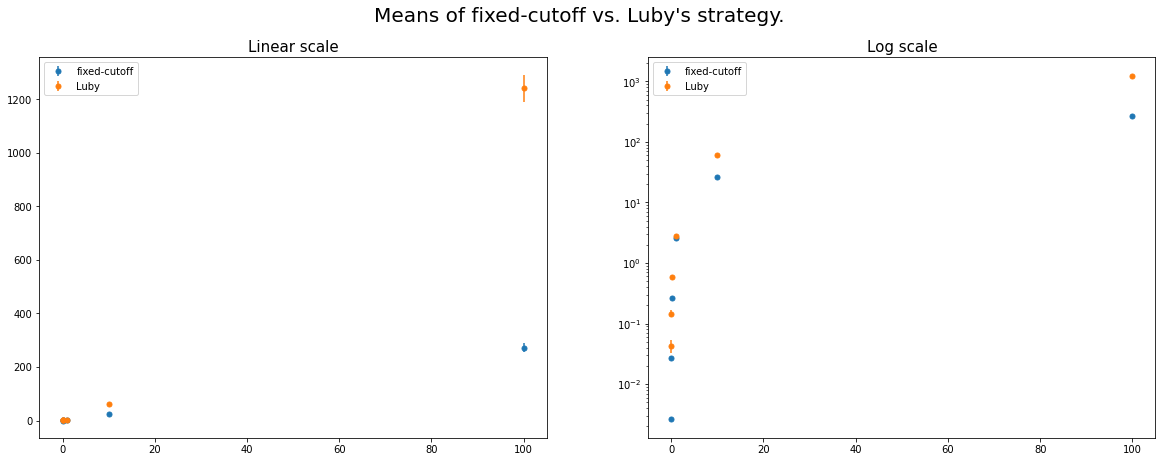

In [9]:
plot_expected_values_with_conf_interval(scales, fixed_means, fixed_conf, luby_means, luby_conf)

Text(0.5, 0.98, "Means of fixed-cutoff vs. Luby's strategy.")

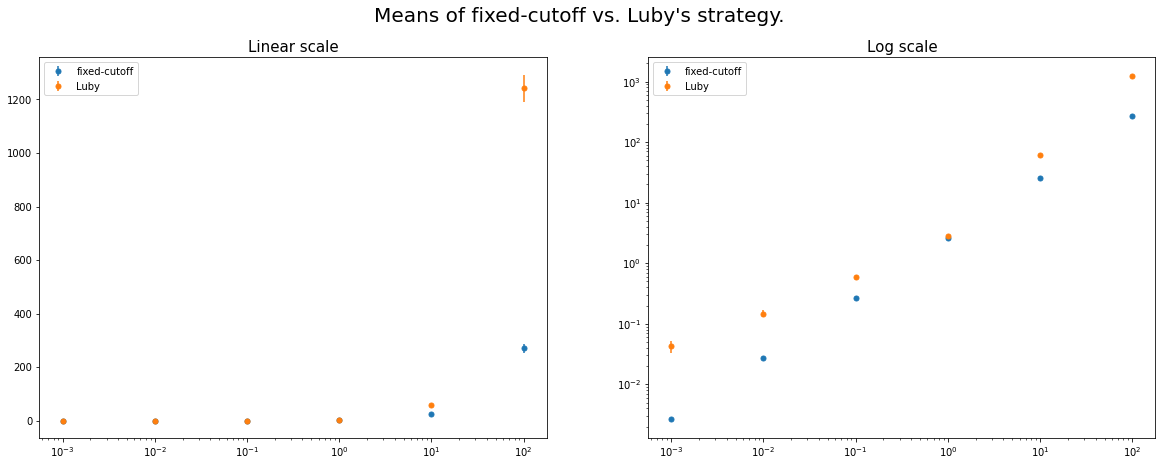

In [15]:
fixed_delta = np.array(fixed_conf).transpose() - fixed_means
fixed_delta = np.abs(fixed_delta)
luby_delta = np.array(luby_conf).transpose() - luby_means
luby_delta = np.abs(luby_delta)

fig = plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.errorbar(scales, fixed_means, yerr=fixed_delta, fmt='.', markersize=10, label='fixed-cutoff')
plt.errorbar(scales, luby_means, yerr=luby_delta, fmt='.', markersize=10, label='Luby')
plt.xscale('log')
plt.legend()
plt.title("Linear scale", fontsize=15)

plt.subplot(1,2,2)
plt.errorbar(scales, fixed_means, yerr=fixed_delta, fmt='.', markersize=10, label='fixed-cutoff')
plt.errorbar(scales, luby_means, yerr=luby_delta, fmt='.', markersize=10, label='Luby')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.title("Log scale", fontsize=15)

fig.suptitle("Means of fixed-cutoff vs. Luby's strategy.", fontsize=20)

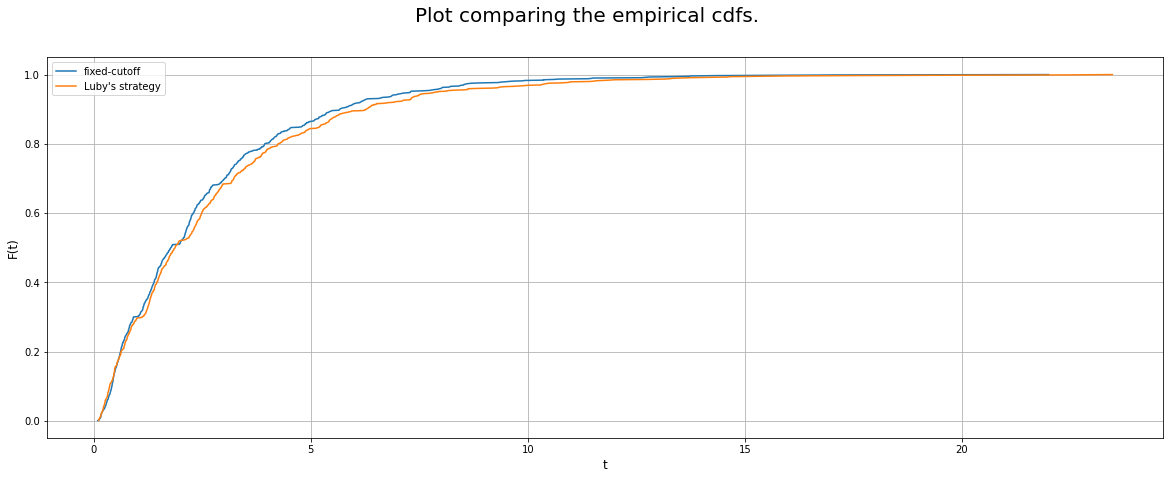

In [83]:
# We compare the distribution of both strategies.
compare_fixed_luby_by_cdf(fixed_data, luby_data)

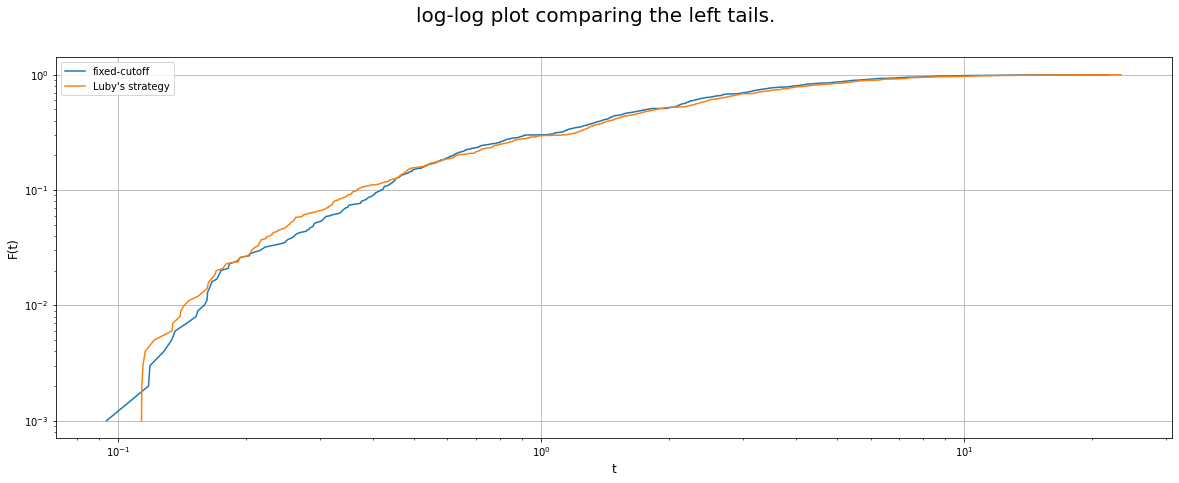

In [84]:
compare_fixed_luby_by_left_tail(fixed_data, luby_data)

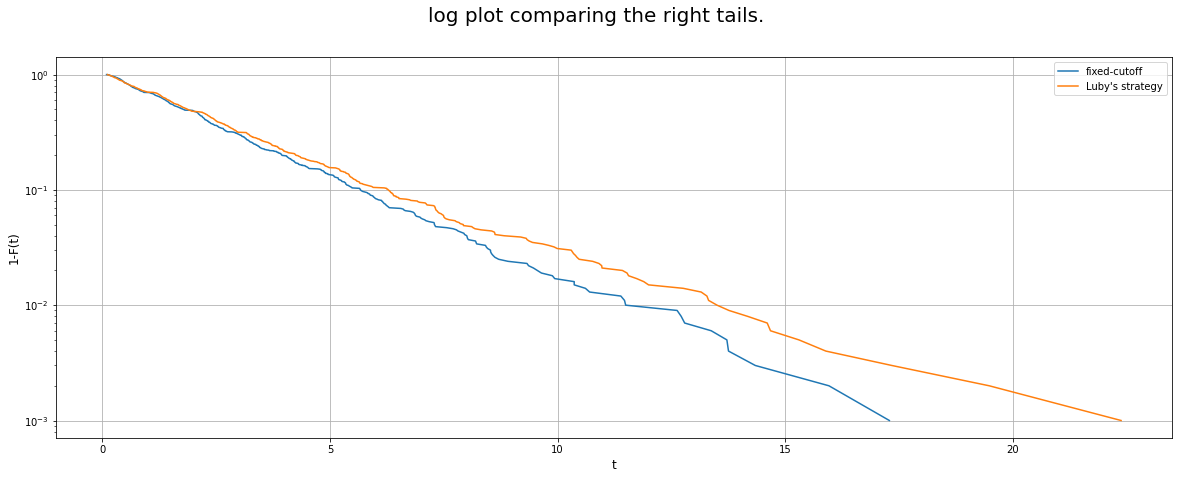

In [85]:
compare_fixed_luby_by_right_tail(fixed_data, luby_data)

# The lognormal distribution

In [86]:
base_path = './lognormal'
sigmas = [0.5, 1.0, 3.0, 5.0, 7.0, 9.0]
mus = [1.0, 3.0, 5.0, 7.0]

## The effect of sigma.
In the following, we observe the effect on the expected value if mu is constant while sigma is increasing.

In [87]:
mu = mus[2]
fixed_files = glob(f"{base_path}/*_mu{mu}*fixed*.csv")
luby_files = glob(f"{base_path}/*_mu{mu}*luby*.csv")

In [88]:
# These lists are for the means of the fixed-cutoff and Luby's strategy.
fixed_means = []
luby_means = []

# These lists are for the confidence intervals of both strategies. 
fixed_conf = []
luby_conf = []
for sigma in sigmas:
    # We restrict ourselves on one sigma per loop cycle.
    fixed_sigma = [f for f in fixed_files if f"sigma{sigma}" in f]
    luby_sigma = [f for f in luby_files if f"sigma{sigma}" in f]
    for fixed_file, luby_file in zip(fixed_sigma, luby_sigma):
        # Here, the data is read from the files.
        fixed_data = np.sort(np.fromfile(fixed_file, dtype=np.float64, sep=","))
        luby_data = np.sort(np.fromfile(luby_file, dtype=np.float64, sep=","))
        # The mean is calculated and added to the appropriate list.
        fixed_means.append(fixed_data.mean())
        fixed_conf.append(sms.DescrStatsW(fixed_data).tconfint_mean())
        # This computes the confidence intervals.
        luby_means.append(luby_data.mean())
        luby_conf.append(sms.DescrStatsW(luby_data).tconfint_mean())

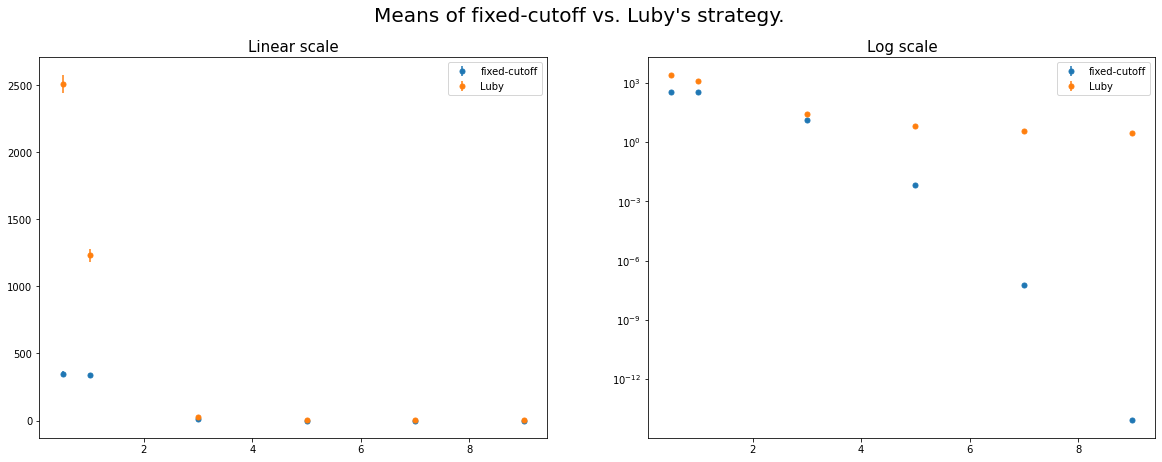

In [89]:
plot_expected_values_with_conf_interval(sigmas, fixed_means, fixed_conf, luby_means, luby_conf)

## The effect of mu.
In the following, we observe the effect on the expected value if sigma is constant and mu is increasing.

In [90]:
sigma = sigmas[2]
fixed_files = glob(f"{base_path}/*_sigma{sigma}*fixed*.csv")
luby_files = glob(f"{base_path}/*_sigma{sigma}*luby*.csv")

In [91]:
# These lists are for the means of the fixed-cutoff and Luby's strategy.
fixed_means = []
luby_means = []

# These lists are for the confidence intervals of both strategies. 
fixed_conf = []
luby_conf = []
for mu in mus:
    # We restrict ourselves on one sigma per loop cycle.
    fixed_sigma = [f for f in fixed_files if f"mu{mu}" in f]
    luby_sigma = [f for f in luby_files if f"mu{mu}" in f]
    for fixed_file, luby_file in zip(fixed_sigma, luby_sigma):
        # Here, the data is read from the files.
        fixed_data = np.sort(np.fromfile(fixed_file, dtype=np.float64, sep=","))
        luby_data = np.sort(np.fromfile(luby_file, dtype=np.float64, sep=","))
        # The mean is calculated and added to the appropriate list.
        fixed_means.append(fixed_data.mean())
        fixed_conf.append(sms.DescrStatsW(fixed_data).tconfint_mean())
        # This computes the confidence intervals.
        luby_means.append(luby_data.mean())
        luby_conf.append(sms.DescrStatsW(luby_data).tconfint_mean())

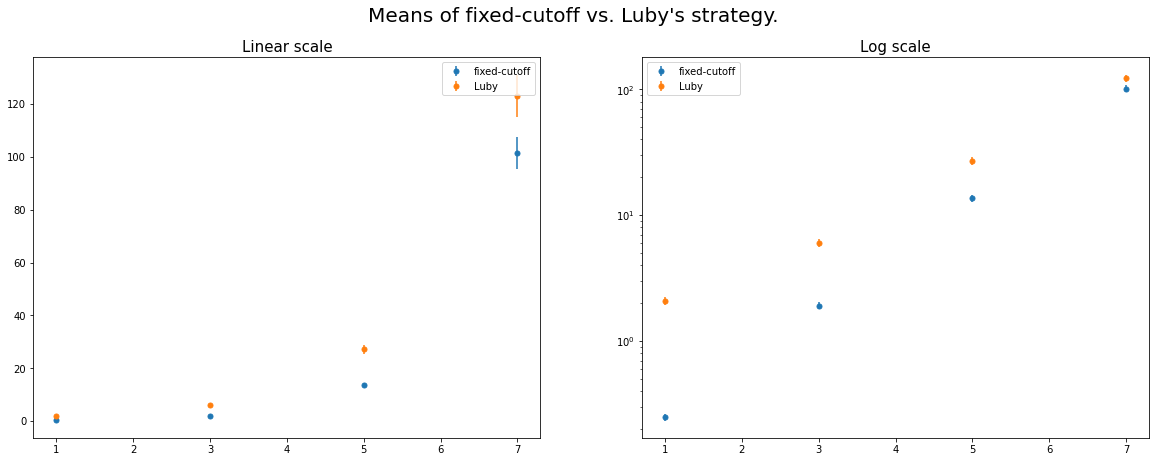

In [92]:
plot_expected_values_with_conf_interval(mus, fixed_means, fixed_conf, luby_means, luby_conf)

# The generalized Pareto distribution

In [43]:
base_path = './genpareto'
cs = [0.5, 1.0, 3.0, 5.0, 7.0, 9.0]
scales = [0.001, 0.1, 1.0, 10.0]

## The effect of c.
In the following, we observe the effect on the expected value if scale is constant while c is increasing.

In [49]:
scale = scales[3]
fixed_files = glob(f"{base_path}/*_scale{scale}*fixed*.csv")
luby_files = glob(f"{base_path}/*_scale{scale}*luby*.csv")

In [50]:
# These lists are for the means of the fixed-cutoff and Luby's strategy.
fixed_means = []
luby_means = []

# These lists are for the confidence intervals of both strategies. 
fixed_conf = []
luby_conf = []
for c in cs:
    # We restrict ourselves on one sigma per loop cycle.
    fixed_sigma = [f for f in fixed_files if f"c{c}" in f]
    luby_sigma = [f for f in luby_files if f"c{c}" in f]
    for fixed_file, luby_file in zip(fixed_sigma, luby_sigma):
        # Here, the data is read from the files.
        fixed_data = np.sort(np.fromfile(fixed_file, dtype=np.float64, sep=","))
        luby_data = np.sort(np.fromfile(luby_file, dtype=np.float64, sep=","))
        # The mean is calculated and added to the appropriate list.
        fixed_means.append(fixed_data.mean())
        fixed_conf.append(sms.DescrStatsW(fixed_data).tconfint_mean())
        # This computes the confidence intervals.
        luby_means.append(luby_data.mean())
        luby_conf.append(sms.DescrStatsW(luby_data).tconfint_mean())

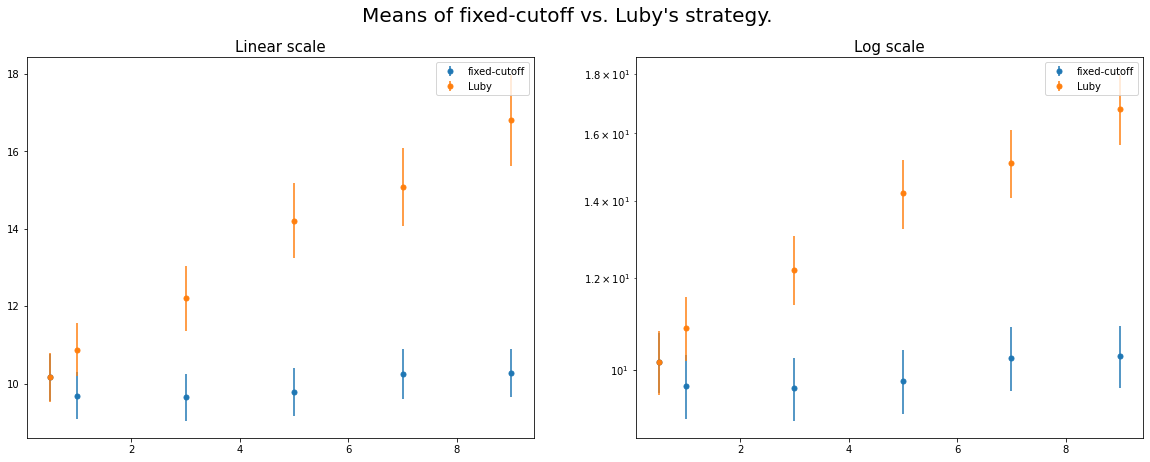

In [51]:
plot_expected_values_with_conf_interval(cs, fixed_means, fixed_conf, luby_means, luby_conf)

## The effect of scale.
In the following, we observe the effect on the expected value if c is constant while scale is increasing.

In [62]:
c = cs[3]
fixed_files = glob(f"{base_path}/*_c{c}*fixed*.csv")
luby_files = glob(f"{base_path}/*_c{c}*luby*.csv")

In [63]:
# These lists are for the means of the fixed-cutoff and Luby's strategy.
fixed_means = []
luby_means = []

# These lists are for the confidence intervals of both strategies. 
fixed_conf = []
luby_conf = []
for scale in scales:
    # We restrict ourselves on one sigma per loop cycle.
    fixed_sigma = [f for f in fixed_files if f"scale{scale}" in f]
    luby_sigma = [f for f in luby_files if f"scale{scale}" in f]
    for fixed_file, luby_file in zip(fixed_sigma, luby_sigma):
        # Here, the data is read from the files.
        fixed_data = np.sort(np.fromfile(fixed_file, dtype=np.float64, sep=","))
        luby_data = np.sort(np.fromfile(luby_file, dtype=np.float64, sep=","))
        # The mean is calculated and added to the appropriate list.
        fixed_means.append(fixed_data.mean())
        fixed_conf.append(sms.DescrStatsW(fixed_data).tconfint_mean())
        # This computes the confidence intervals.
        luby_means.append(luby_data.mean())
        luby_conf.append(sms.DescrStatsW(luby_data).tconfint_mean())

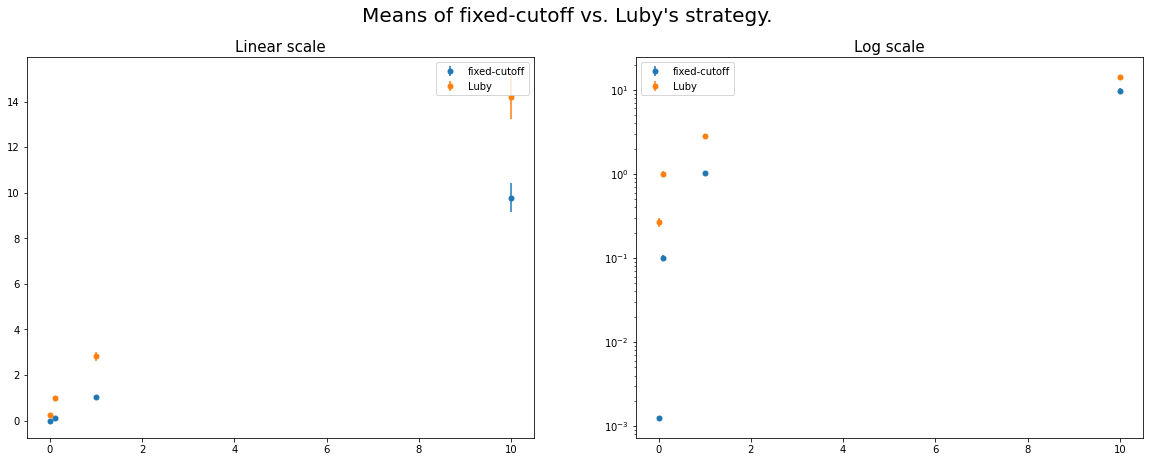

In [64]:
plot_expected_values_with_conf_interval(scales, fixed_means, fixed_conf, luby_means, luby_conf)

Text(0.5, 0.98, "Means of fixed-cutoff vs. Luby's strategy.")

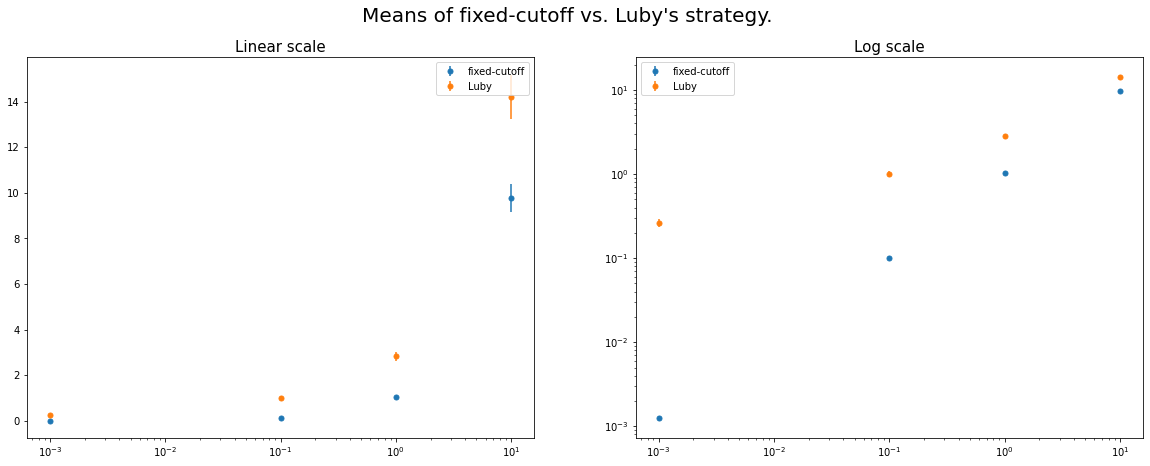

In [65]:
fixed_delta = np.array(fixed_conf).transpose() - fixed_means
fixed_delta = np.abs(fixed_delta)
luby_delta = np.array(luby_conf).transpose() - luby_means
luby_delta = np.abs(luby_delta)

fig = plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.errorbar(scales, fixed_means, yerr=fixed_delta, fmt='.', markersize=10, label='fixed-cutoff')
plt.errorbar(scales, luby_means, yerr=luby_delta, fmt='.', markersize=10, label='Luby')
plt.xscale('log')
plt.legend()
plt.title("Linear scale", fontsize=15)

plt.subplot(1,2,2)
plt.errorbar(scales, fixed_means, yerr=fixed_delta, fmt='.', markersize=10, label='fixed-cutoff')
plt.errorbar(scales, luby_means, yerr=luby_delta, fmt='.', markersize=10, label='Luby')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.title("Log scale", fontsize=15)

fig.suptitle("Means of fixed-cutoff vs. Luby's strategy.", fontsize=20)

In [2]:
from scipy.special import erfcinv, erfinv, erf
from scipy.optimize import bisect, minimize
import numpy as np
from functools import partial
import statsmodels.stats.api as sms

In [3]:
def lognorm_Q(p, sigma=1.0, mu=1.0):
    x = np.sqrt(2)*sigma*erfinv(2*p-1)+mu
    return np.exp(x)

def lognorm_QS(p, sigma=1.0, mu=1.0):
    erf_inv = erfinv(2 * p - 1)
    x = np.power(erf_inv, 2) + np.sqrt(2) * sigma * erf_inv + mu
    return sigma * np.sqrt(2*np.pi) * np.exp(x)

def lognorm_QG(p, sigma=1.0, mu=1.0):
    x = erf(sigma/np.sqrt(2) - erfinv(2*p - 1))
    return - 0.5 * np.exp(mu + np.power(sigma, 2)/2.0) * x

In [4]:
# Return the expected runtme with (fixed-cutoff) restarts at quantile p.
def calculate_expectation(p, Q, QG):
    return (1-p)/p * Q(p) + (QG(p)-QG(0))/p

# The root of this function corresponds to an optimal restart quantile.
# c.f. https://link.springer.com/chapter/10.1007/978-3-319-73117-9_35
def minima_function(p, Q, QS, QG):
    return (p-1)*Q(p)+(1-p)*p*QS(p)-QG(p)+QG(0)

In [11]:
sigma = 1.0
mu = 7.0
min=0.0001
max=0.99999

In [12]:
eps = np.power(10.0, -50)
Q = partial(lognorm_Q, sigma=sigma, mu=mu)
QS = partial(lognorm_QS, sigma=sigma, mu=mu)
QG = partial(lognorm_QG, sigma=sigma, mu=mu)
lognorm_exp = lambda p: calculate_expectation(p, Q, QG) if p > eps else np.infty
lognorm_minima = lambda p: minima_function(p, Q, QS, QG) if p > eps else -eps

In [14]:
quantile_lognorm = bisect(lognorm_minima, min, max)
quantile_lognorm

0.708521829727511

In [47]:
m = lognorm_exp(quantile_lognorm)
m

1613.175250825314

In [49]:
np.log(m)

7.385959721216089

In [44]:
luby_means

[5.204162161235459, 90.06822001269278, 1232.5557262108996, 13015.9891736692]

In [51]:
def bound(x):
    return 128*x*(4+np.log(x)/np.log(2))

In [59]:
sigma = 1.0
eps = np.power(10.0, -50)
optimal = []
optimal_bound = []
for mu in range(1, 9, 2):
    Q = partial(lognorm_Q, sigma=sigma, mu=mu)
    QS = partial(lognorm_QS, sigma=sigma, mu=mu)
    QG = partial(lognorm_QG, sigma=sigma, mu=mu)
    lognorm_exp = lambda p: calculate_expectation(p, Q, QG) if p > eps else np.infty
    lognorm_minima = lambda p: minima_function(p, Q, QS, QG) if p > eps else -eps
    quantile_lognorm = bisect(lognorm_minima, min, max)
    m = lognorm_exp(quantile_lognorm)
    optimal.append(m)
    optimal_bound.append(bound(m))

In [56]:
optimal

[3.998661664327546, 29.546335358359638, 218.31952948073757, 1613.175250825314]

In [58]:
np.array(luby_means)/np.array(optimal)

array([1.30147599, 3.04837195, 5.64565034, 8.06855248])

In [60]:
optimal_bound

[3070.725055842898, 33602.10568548973, 328919.7805951146, 3026200.6140845884]

In [61]:
np.array(optimal_bound)/np.array(luby_means)

array([590.05176255, 373.07393974, 266.85996714, 232.49870399])